# Rock-paper-scissors with Keras/TensorFlow (CNN)

Date: 2023/10/14

Classification: rock, paper, 
scissors

## Preparing data set for CNN

In [1]:
DATA_FOLDER = '../python/ThermographyGUI/data/'
SCREENSHOTS_FOLDER = '../python/ThermographyGUI/screenshots/'

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time
import random
import os
import sklearn.preprocessing as pp
import glob

In [3]:
data_files = glob.glob(DATA_FOLDER+'*.csv')
num_all_files = len(data_files)

In [4]:
data_files[0]

'../python/ThermographyGUI/data/paper-20190106130441.csv'

In [5]:
class_labels = {}

for file in data_files:
    label = file.split('-')[0].replace('\\', '/').split('/')[-1]
    if label not in class_labels:
        class_labels[label] = 1
    else:
        class_labels[label] += 1

class_labels

{'paper': 140, 'scissors': 140, 'rock': 140}

In [6]:
#Check if all values of class labels is equal to each other 
if (len(set(class_labels.values())) == 1):
    print('Check OK')
else:
    print('Check NG')

Check OK


In [7]:
num_classes = len(class_labels.keys())
num_files = list(class_labels.values())[0]
num_train_files = int(num_files * 4/5)
num_test_files = num_files - num_train_files
'num_classes: {}, num_train_files: {}, num_test_files: {}'.format(num_classes, num_train_files, num_test_files)

'num_classes: 3, num_train_files: 112, num_test_files: 28'

In [8]:
data_set = {}

class_number = 0

for label in class_labels:
    files = glob.glob(DATA_FOLDER+'{}-*.csv'.format(label))
    random.shuffle(files)
    data_set[label] = (files[:num_train_files], files[num_train_files:num_files], class_number)
    class_number += 1

In [9]:
training_set = []
test_set = []

In [10]:
for k, v in data_set.items():
    files = v[0]
    class_number = v[2]
    for file in files:
        with open(file) as f:
            data = np.array(f.read().split(',')).astype(float)
            training_set.append((data, class_number))
    files = v[1]
    for file in files:
        with open(file) as f:
            data = np.array(f.read().split(',')).astype(float)
            test_set.append((data, class_number))
random.shuffle(training_set)
random.shuffle(test_set)

In [11]:
training_set[0]

(array([28.5, 27.2, 30.2, 31. , 31. , 31. , 27. , 26. , 29. , 28.5, 29.5,
        30.8, 31.2, 30.8, 28.2, 26. , 27.8, 28.5, 26. , 30. , 31. , 30. ,
        27.8, 27.5, 25.2, 25.5, 25.2, 29.2, 29.5, 28.5, 27. , 26.5, 24.5,
        24.5, 25.2, 28.8, 29.8, 27.5, 27.8, 25.5, 24.5, 24.5, 25. , 25.5,
        26.5, 25.5, 25.2, 25. , 25.5, 25. , 24.5, 24.8, 24.8, 24.8, 24.5,
        24.8, 25. , 25.5, 24.5, 24.8, 24.2, 24.2, 23.8, 24.5]),
 0)

In [12]:
class_labels = [None for _ in range(len(data_set))]

# Class number and class labels
for k,v in data_set.items():
    print('{}: {}'.format(v[2],k))
    class_labels[v[2]] = k
    
import yaml
with open(DATA_FOLDER+'class_labels.yaml', 'w') as f:
    yaml.dump(class_labels, f)

0: paper
1: scissors
2: rock


In [13]:
train_data, train_labels = [], []
test_data, test_labels = [], []

In [14]:
def gen_data_labels(data_set):
    d = []  # data
    l = []  # labels
    for img, label in data_set:
        img = img.reshape(8,8)
        img = pp.scale(img)  # Standardization
        d.append(img)
        l.append(label)
    d = np.array(d)
    l = np.array(l, dtype=np.uint8)
    return (d, l)

train_data, train_labels = gen_data_labels(training_set)
test_data, test_labels = gen_data_labels(test_set)

In [15]:
train_data[0]

array([[ 1.28887459,  0.668099  ,  1.85310149,  1.16024748,  0.92323864,
         1.26115319,  0.37449308,  0.2975147 ],
       [ 1.57529116,  1.49526919,  1.52366122,  1.07988402,  0.99709773,
         1.18263782,  1.1394151 ,  0.2975147 ],
       [ 0.88789138,  1.49526919, -0.1235401 ,  0.75843017,  0.92323864,
         0.86857632,  0.88444109,  1.92032215],
       [-0.60147481, -0.4135851 , -0.50004326,  0.43697632,  0.36929546,
         0.27971102,  0.37449308,  0.83845052],
       [-1.00245801, -1.04986986, -0.50004326,  0.2762494 ,  0.48008409,
        -0.11286585,  0.88444109, -0.24342112],
       [-1.00245801, -1.04986986, -0.59416905, -1.04974772, -0.73859091,
        -0.89801959, -0.77288996, -0.78435693],
       [-0.42962486, -0.73172748, -0.82948352, -1.33101984, -1.36639319,
        -1.1728234 , -1.21909448, -1.00073126],
       [-0.71604144, -0.4135851 , -0.82948352, -1.33101984, -1.58797046,
        -1.40836952, -1.665299  , -1.32529275]])

In [16]:
test_labels

array([0, 2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1,
       0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2,
       1, 0, 2, 0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2], dtype=uint8)

In [17]:
from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [18]:
train_labels[0]

array([1., 0., 0.], dtype=float32)

## CNN model

In [19]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(6, (3, 3), padding='valid', activation='relu', input_shape=(8, 8, 1)))
#model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(12, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 6)           60        
                                                                 
 dropout (Dropout)           (None, 6, 6, 6)           0         
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 12)          660       
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 12)          0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 12)          0         
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                        

In [20]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
from IPython.display import SVG
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
EPOCHS = 800
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Epoch 1/800
11/11 [==============================] - 0s 8ms/step - loss: 1.1589 - accuracy: 0.2887 - val_loss: 1.0827 - val_accuracy: 0.3333
Epoch 2/800
11/11 [==============================] - 0s 2ms/step - loss: 1.0971 - accuracy: 0.3690 - val_loss: 1.0730 - val_accuracy: 0.4286
Epoch 3/800
11/11 [==============================] - 0s 2ms/step - loss: 1.0744 - accuracy: 0.3869 - val_loss: 1.0616 - val_accuracy: 0.4405
Epoch 4/800
11/11 [==============================] - 0s 2ms/step - loss: 1.0697 - accuracy: 0.4286 - val_loss: 1.0562 - val_accuracy: 0.5238
Epoch 5/800
11/11 [==============================] - 0s 2ms/step - loss: 1.0676 - accuracy: 0.4167 - val_loss: 1.0515 - val_accuracy: 0.5119
Epoch 6/800
11/11 [==============================] - 0s 2ms/step - loss: 1.0249 - accuracy: 0.4911 - val_loss: 1.0398 - val_accuracy: 0.5357
Epoch 7/800
11/11 [==============================] - 0s 2ms/step - loss: 1.0171 - accuracy: 0.4702 - val_loss: 1.0341 - val_accuracy: 0.5357
Epoch 8/800
1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


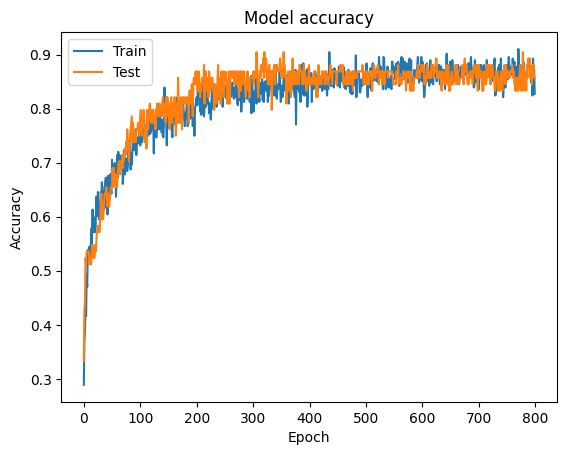

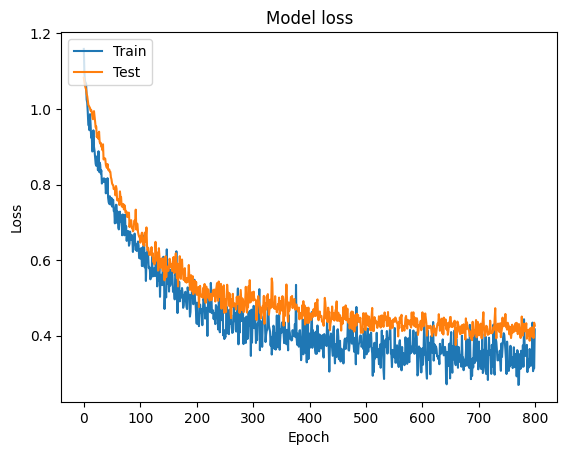

In [23]:
print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Save the model

In [32]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = 'rock_paper_scissors_dct_{}.h5'.format(dt)
model.save(filename)

## load the model

In [25]:
del model
model = models.load_model(filename)

## Confirmation

In [26]:
import numpy as np
import matplotlib.pyplot as plt
train_data.shape

(336, 8, 8)

In [27]:
layer_outputs = [layer.output for layer in model.layers]

In [28]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)

3/3 [==============================] - 0s 1ms/step


In [29]:
class_labels

['paper', 'scissors', 'rock']

In [30]:
(activations[-1][:10]*100).astype(int)

array([[60, 28, 10],
       [14, 27, 57],
       [ 1,  1, 96],
       [38, 48, 12],
       [13,  3, 83],
       [97,  0,  1],
       [93,  4,  2],
       [60, 36,  2],
       [15, 14, 70],
       [ 0, 95,  3]])

In [31]:
test_labels[:10].astype(int)

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])